###  설치

- conda install pytorch-cpu torchvision-cpu -c pytorch

### PyTorch (파이토치)

- 딥러닝 프레임웍(엔진)
- Lua(루아) 언어로 만든 오픈소스 라이브러리
- 뉴욕대 + 페이스북 공동 개발
- 루아로 만들어 뒀을대는 별로 인기가 없었다(접근성 힘든). 파이썬버전으로 나오고 나서 1.0발표후 급격하게 증가
- 딥러닝 프레임웍의 특성
    - 복잡한, 큰 계산 그래프를 손쉽게 개발
    - 계산 그래프를 이용하여 미적분 같은 연산도 쉽게 처리
    - GPU 연산을 효율적으로 수행
- 파이토치 특징
    - Numpy 기반 Tensor 연산을 GPU로 수행 가능
    - 자동미분시스템을 이용하여 모델을 쉽게 구성한다
    - 파이썬과 같이 활용
        - Scipy : 과학 컴퓨팅과 기술 컴퓨팅에 사용
        - Numpy : 행렬, 대규모의 다차원 배열을 쉽게 처리:수학/과학용 라이브러리
        - Cython: 파이썬의 빠른 생산성, 외부C의 강력한 처리속도를 연동하여 수행
    - Dynamic Graph Define : 변수 선언 동시에 그래프를 그리고 연산을 가능하게 만든다

### Tensorflow vs PyTorch
**장르의 경계는 없다**

- Tensorflow : 산업용
    - Define-and-Run 방식
        - 계산 그래프를 그림
            - 세션에 그래프에 들어갈 수치를 대입
        - 연산 실행
- PyTorch : 학계용
    - Deine-by-Run 방식
        - 계산 그래프를 그리는 동시에
        - 그래프에 들어간 숫자를 보관하고 있고
        - 연산 실행이 바로 수행 가능하다
    - 2018.10이후 산업용으로 확산되고 있다 (제품화 솔류션을 지원)

- 텐서 : Tensor
    - 딥러닝은 텐서를 기반으로 진행하는 연산의 연속
    - 텐서의 종류 : 딥러닝의 중요 단위
    <img src='./8.tensor.jpeg'>

In [1]:
import torch

In [5]:
# 리스트로부터 텐서 생성
tmp_list = [ [1,2,3], [4,5,6] ]
x_list_tensor = torch.Tensor( tmp_list )
# 텐서를 생성하면 정수값도 float로 변환된다
x_list_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
# 원복 :  Tensor => 리스트 추출
x_list_tensor.tolist()

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [4]:
import numpy as np

In [7]:
# 배열 (numpy ndarray) :
x_numpy_array = np.array( tmp_list )
x_numpy_array

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
x = torch.Tensor( x_numpy_array )  
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [9]:
# 원복
x.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

- GPU 사용

In [10]:
x.device

device(type='cpu')

In [12]:
# NVIDIA의 cuda 지원 여부
device = 'cuda'
try:
    x = x.to(device)
    print( '%s 지원' % device, x )
except Exception as e:
    print( '%s 미지원' % device, e )

cuda 미지원 Torch not compiled with CUDA enabled


In [13]:
device = 'cpu'
try:
    x = x.to(device)
    print( '%s 지원' % device, x )
except Exception as e:
    print( '%s 미지원' % device, e )

cpu 지원 tensor([[1., 2., 3.],
        [4., 5., 6.]])


- 랜덤 텐서 생성

In [14]:
# 2x3 행렬 생성, 난수값 0~1사이
torch.rand( 2, 3 )

tensor([[0.7569, 0.5801, 0.2472],
        [0.1385, 0.3876, 0.6411]])

In [33]:
# 0<=x<5사이 랜덤값 2x3 행렬 생성
torch.randint( low=0, high=5, size=(2,3) )

tensor([[4, 3, 1],
        [0, 0, 2]])

In [34]:
# 영행렬
torch.zeros( 2, 2 )

tensor([[0., 0.],
        [0., 0.]])

In [35]:
# 구성원이 1인 행렬
torch.ones( 2, 2)

tensor([[1., 1.],
        [1., 1.]])

In [36]:
# 특정 텐서의 크기와 동일한 영행렬를 만들어라
torch.zeros_like( x )

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [37]:
torch.ones_like( x )

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [40]:
# gpu를 이용하녀 동을 크기의 영행렬 생성
try:
    torch.zeros_like( x.cuda() )
except Exception as e:pass

- 텐서의 타입
 <img src='./8.torch_type.png'>

In [41]:
# 실수형 텐서
a = torch.FloatTensor(  x_numpy_array )

In [42]:
# 타입 확인은 텐서.type()
a.type(), type(a), a

('torch.FloatTensor', torch.Tensor, tensor([[1., 2., 3.],
         [4., 5., 6.]]))

In [43]:
# 정수형 텐서
b = torch.IntTensor( x_numpy_array )
b.type(), b

('torch.IntTensor', tensor([[1, 2, 3],
         [4, 5, 6]], dtype=torch.int32))

In [ ]:
# numpy ndarray => 행렬의 구성의 모든 타입은 동일하다

In [45]:
# 8-bit unsigned ByteTensor, 이진 데이터
c = torch.ByteTensor( [True, False, True, False] )
c.type(), c

('torch.ByteTensor', tensor([1, 0, 1, 0], dtype=torch.uint8))

- 텐서 오퍼레이션
    - 슬라이싱
    - 뷰
    - 트렌스포즈
    - 스퀴즈, 언스퀴즈
    - 캣(cat), 스택(stack)
    - 기본연산 (더하기, 빼기, 곱하기, 나누기)
    - 합, 평균
    - 최대, 최소
    - 논리연산

- Slicing, indexing

In [46]:
# 작업의 일관성을 주기 위해 -> 씨드
torch.manual_seed( 555 )

In [47]:
# 크기가 2,3,4 3차원 텐서(큐브)를 생성하시오, 값은 0<= n <= 9, 변수는 x , 정수, 램덤
x = torch.randint( 0, 10, size=(2,3,4) )
x

tensor([[[6, 0, 3, 5],
         [8, 3, 4, 0],
         [3, 1, 4, 9]],

        [[6, 4, 0, 8],
         [5, 4, 9, 3],
         [4, 0, 0, 8]]])

In [48]:
x[0]

tensor([[6, 0, 3, 5],
        [8, 3, 4, 0],
        [3, 1, 4, 9]])

In [49]:
x[0][2]

tensor([3, 1, 4, 9])

In [50]:
# 차원 축소하는 방식은 차원별로 []를 사용하는 방법도 가능
x[0][2][3]

tensor(9)

In [51]:
# 차원별로 인덱스를 나열하는 것도 가능
x[0, 2, 3]

tensor(9)

In [52]:
# 텐서 시각화 
import matplotlib.pyplot as plt

In [54]:
# 크기가 2,3,4 3차원
len(x), len(x[0])

(2, 3)

In [55]:
# 텐서 시각화 함수
def tenser_draw( tmp ):
    fig, axes = plt.subplots( len(tmp), 1 )
    for i in range( len(tmp) ):
        # 차트의 최대값 1, 최소값 0, 배열의 1차원의 첫번째, 두번째등,.. 각각 그린다
        # 값이 0 혹은 1 이므로 연산의 결과를 필터를 통과시켜 영향을 받는 부분을 
        # 0으로 표시하여 시각화시 검은색으로 표현된 부분이 연산의 영향받은 부분으로 
        # 판정
        axes[i].matshow( tmp.numpy()[i], vmin=0, vmax=1, cmap='gray' )
    plt.show()

In [56]:
# x와 동일한 크기의 텐서인 1로 채워진 큐브를 구성하시오
tmp = torch.ones_like( x )
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [57]:
# x[0, 2, 3] 값은?
# 시각적으로 위치가 어디인가? 
tmp[0, 2, 3] = 0

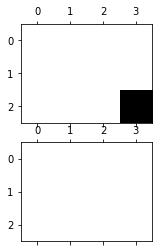

In [58]:
tenser_draw( tmp )

In [66]:
tmp1 = torch.zeros_like(x)
tmp1

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

In [67]:
tmp1[ 0, 2, 3 ] = 1
tmp1

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 1]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

In [68]:
x * tmp1

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 9]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

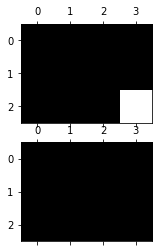

In [69]:
tenser_draw( x * tmp1 )

In [70]:
x[0, :2, 3]

tensor([5, 0])

In [73]:
tmp1 = torch.zeros_like(x)

In [75]:
tmp1[0, :2, 3] = 1
tmp1

tensor([[[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

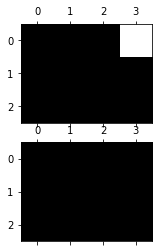

In [76]:
tenser_draw( x * tmp1 )

- view
    - 쉐이프 변경 
    - numpy.reshape()과 동일, 실제도 그함수 존재

In [77]:
x.shape

torch.Size([2, 3, 4])

In [79]:
# x = 2*3*4 => 24
x

tensor([[[6, 0, 3, 5],
         [8, 3, 4, 0],
         [3, 1, 4, 9]],

        [[6, 4, 0, 8],
         [5, 4, 9, 3],
         [4, 0, 0, 8]]])

In [78]:
# 2 * 2* 6 = 24
# 순차적으로 6개를 맞추고, 부족하면 다음 차원에서 댕기고
# 다음번은 사용한 다음부터 차례대로 개수를 맞춰서 차원을 구성
x.view( 2, 2, 6 )

tensor([[[6, 0, 3, 5, 8, 3],
         [4, 0, 3, 1, 4, 9]],

        [[6, 4, 0, 8, 5, 4],
         [9, 3, 4, 0, 0, 8]]])

In [80]:
x.reshape( 2, 2, 6 )

tensor([[[6, 0, 3, 5, 8, 3],
         [4, 0, 3, 1, 4, 9]],

        [[6, 4, 0, 8, 5, 4],
         [9, 3, 4, 0, 0, 8]]])

In [81]:
# -1 몇개가 될지 모르겟다 뒤를 맞추고 나오는대로 앞에를 세팅
x.view( -1, 1, 12 )

tensor([[[6, 0, 3, 5, 8, 3, 4, 0, 3, 1, 4, 9]],

        [[6, 4, 0, 8, 5, 4, 9, 3, 4, 0, 0, 8]]])

- transpose : 차원 맞교환

In [82]:
x, x.shape

(tensor([[[6, 0, 3, 5],
          [8, 3, 4, 0],
          [3, 1, 4, 9]],
 
         [[6, 4, 0, 8],
          [5, 4, 9, 3],
          [4, 0, 0, 8]]]), torch.Size([2, 3, 4]))

In [83]:
# 0차원과 1차원을 맞교환
# 2x3x4 => 3x2x4
x_trans = x.transpose( 0, 1 )
x_trans.size()

torch.Size([3, 2, 4])

In [84]:
x_trans

tensor([[[6, 0, 3, 5],
         [6, 4, 0, 8]],

        [[8, 3, 4, 0],
         [5, 4, 9, 3]],

        [[3, 1, 4, 9],
         [4, 0, 0, 8]]])

- squeeze , unsqueeze

In [89]:
x = torch.rand( (2, 1, 3, 5, 1) )
x

tensor([[[[[0.8503],
           [0.2049],
           [0.7583],
           [0.4845],
           [0.1248]],

          [[0.8066],
           [0.6695],
           [0.1564],
           [0.7216],
           [0.4099]],

          [[0.8204],
           [0.0297],
           [0.8917],
           [0.3564],
           [0.8843]]]],



        [[[[0.3886],
           [0.4357],
           [0.5472],
           [0.4198],
           [0.7805]],

          [[0.6914],
           [0.9525],
           [0.7793],
           [0.3971],
           [0.6740]],

          [[0.7590],
           [0.2982],
           [0.6666],
           [0.4889],
           [0.7413]]]]])

In [90]:
# 모든 차원에서 1차값을 가진 차원을 제거 => 2, 3, 5
x.squeeze().size()

torch.Size([2, 3, 5])

In [91]:
x.squeeze()

tensor([[[0.8503, 0.2049, 0.7583, 0.4845, 0.1248],
         [0.8066, 0.6695, 0.1564, 0.7216, 0.4099],
         [0.8204, 0.0297, 0.8917, 0.3564, 0.8843]],

        [[0.3886, 0.4357, 0.5472, 0.4198, 0.7805],
         [0.6914, 0.9525, 0.7793, 0.3971, 0.6740],
         [0.7590, 0.2982, 0.6666, 0.4889, 0.7413]]])

In [92]:
# 행렬의 두번째 차원 ( 인덱스로는 1)를 스퀴즈 한다
# 스퀴즈는 차원이 1일경우에만
x.squeeze(1).size()

torch.Size([2, 3, 5, 1])

In [93]:
# 인덱스 3번 4차원 자리에 차웤의 크기 1인 행렬을 삽입
x.unsqueeze(3).size()

torch.Size([2, 1, 3, 1, 5, 1])

- cat , stack

In [94]:
A = torch.rand( (2, 3) )
B = torch.rand( (2, 3) )
A, B

(tensor([[0.3483, 0.1843, 0.9316],
         [0.8832, 0.2593, 0.7096]]), tensor([[0.2097, 0.4230, 0.7645],
         [0.7475, 0.5988, 0.8994]]))

In [95]:
AB_cat = torch.cat( [ A, B], dim=0 )
AB_cat

tensor([[0.3483, 0.1843, 0.9316],
        [0.8832, 0.2593, 0.7096],
        [0.2097, 0.4230, 0.7645],
        [0.7475, 0.5988, 0.8994]])

In [96]:
AB_cat.size()

torch.Size([4, 3])

In [98]:
AB_cat = torch.cat( [ A, B], dim=1 )
AB_cat

tensor([[0.3483, 0.1843, 0.9316, 0.2097, 0.4230, 0.7645],
        [0.8832, 0.2593, 0.7096, 0.7475, 0.5988, 0.8994]])

In [99]:
AB_cat.size()

torch.Size([2, 6])

In [100]:
# 0차에 A와 B를 차례대로 쌓는다 => 차원이 하나더 생긴다
AB_stack = torch.stack( [A, B], dim=0 )
AB_stack.size()

torch.Size([2, 2, 3])

In [101]:
AB_stack

tensor([[[0.3483, 0.1843, 0.9316],
         [0.8832, 0.2593, 0.7096]],

        [[0.2097, 0.4230, 0.7645],
         [0.7475, 0.5988, 0.8994]]])

- 사칙연산

In [107]:
x = torch.Tensor( [1, 2, -3] )
y = torch.Tensor( [4, -3, 2] )

In [108]:
x.shape, y.shape, x.size(), y.size()

(torch.Size([3]), torch.Size([3]), torch.Size([3]), torch.Size([3]))

In [109]:
# 더하기
x + y

tensor([ 5., -1., -1.])

In [110]:
# 교환법칙 성립
y + x

tensor([ 5., -1., -1.])

In [111]:
# 빼기, 교환법칙 성립 않함
x - y 

tensor([-3.,  5., -5.])

In [112]:
y - x

tensor([ 3., -5.,  5.])

In [113]:
# 교환법칙성립, x와 y의 shape는 동일하다
x * y

tensor([ 4., -6., -6.])

In [114]:
x * y

tensor([ 4., -6., -6.])

In [117]:
torch.mul( x, y )

tensor([ 4., -6., -6.])

In [115]:
x / y

tensor([ 0.2500, -0.6667, -1.5000])

In [116]:
y / x

tensor([ 4.0000, -1.5000, -0.6667])

In [118]:
# x1*y1 + x2*y2+....
torch.dot( x, y )

tensor(-8.)

- sum , mean

In [119]:
# 2x2x2
z = torch.Tensor( [ [ [1,2],[3,4] ],[ [5,6],[7,8]] ] )
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [120]:
torch.sum( z )

tensor(36.)

In [121]:
torch.mean( z )

tensor(4.5000)

In [123]:
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [122]:
torch.sum( z, dim=0 )

tensor([[ 6.,  8.],
        [10., 12.]])

In [124]:
torch.mean( z, dim=0 )

tensor([[3., 4.],
        [5., 6.]])

- max, argmax, min, argmin

In [125]:
# 텐서의 요소들중 최대값과 그 최대값의위치
torch.max( z ), torch.argmax( z )

(tensor(8.), tensor(7))

In [126]:
# 최소, 최소위치
torch.min( z ), torch.argmin( z )

(tensor(1.), tensor(0))

In [128]:
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [127]:
torch.max( z, dim=0 )

torch.return_types.max(
values=tensor([[5., 6.],
        [7., 8.]]),
indices=tensor([[1, 1],
        [1, 1]]))

In [129]:
torch.min( z, dim=0 )

torch.return_types.min(
values=tensor([[1., 2.],
        [3., 4.]]),
indices=tensor([[0, 0],
        [0, 0]]))

- 논리연산 => True/False => 이진데이터의 텐서

In [133]:
z = torch.Tensor( [-3, 2, 1, 0] )

In [134]:
print( z == 0 )

tensor([0, 0, 0, 1], dtype=torch.uint8)


In [135]:
z.eq(0)

tensor([0, 0, 0, 1], dtype=torch.uint8)

In [136]:
z.ge(0), z >= 0

(tensor([0, 1, 1, 1], dtype=torch.uint8),
 tensor([0, 1, 1, 1], dtype=torch.uint8))

In [137]:
z.gt(0), z>0

(tensor([0, 1, 1, 0], dtype=torch.uint8),
 tensor([0, 1, 1, 0], dtype=torch.uint8))

In [138]:
z.lt(0), z<0, z.le(0), z<=0

(tensor([1, 0, 0, 0], dtype=torch.uint8),
 tensor([1, 0, 0, 0], dtype=torch.uint8),
 tensor([1, 0, 0, 1], dtype=torch.uint8),
 tensor([1, 0, 0, 1], dtype=torch.uint8))